In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import tplquad

# CALCULATE INTEGRAL NO.3

In [3]:
def h(z,y,x):
    return x+y+z
def f1(x,y): # paraboloid
    return 4-x**2-y**2
def f2(x): # domain
    return np.sqrt(4-x**2)

In [4]:
def integral3_calculate():
    integral3_result = tplquad(h, 0,2,0,f2,0,f1)
    return integral3_result[0]
integral3_calculate()

16.910913742738952

## -Draw domain

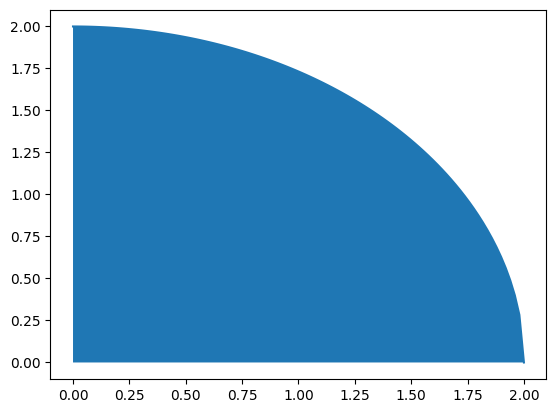

In [5]:
def draw_domain():
    x_list = np.linspace(0,2,100)
    
    plt.plot(x_list, f2(x_list))
    plt.fill_between(x_list,0,f2(x_list))
    plt.show()
draw_domain()

## -Draw 3D

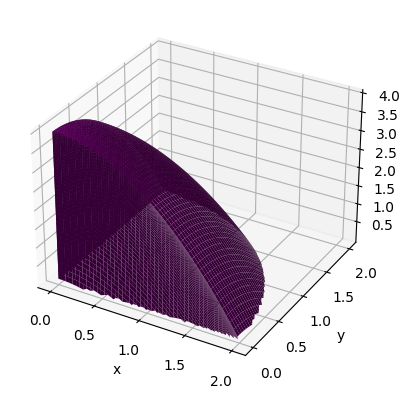

In [40]:

def boundary_function(x, y):
    return np.where(x ** 2 + y ** 2 < 4, 4 - x ** 2 - y ** 2, None)


def draw_graph():
    x_domain = np.linspace(0, 2, 100)
    y_domain = np.linspace(0, 2, 100)

    X, Y = np.meshgrid(x_domain, y_domain)
    Z = boundary_function(X, Y)

    ax1 = plt.axes(projection='3d')

    ax1.plot_surface(X, Y, Z, color='purple')

    ax1.plot_surface(X, 0, Z, color='purple')
    ax1.plot_surface(0, Y, Z, color='purple')

    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    

draw_graph()

# RIEMANN SUM

## - Functions and boundaries

In [41]:
def h(x,y,z): 
    if (z < f(x,y)):
        return x+y+z
    else:
        return 0
    
def f(x,y): #paraboloid
    return 4 - x**2 - y**2
    

## - Riemann calculate

In [42]:
def riemann_sum(x_start,x_end,y_start,y_end,z_start,z_end,partitions):
    
    dx = (x_end - x_start)/partitions
    dy = (y_end - y_start)/partitions
    dz = (z_end - z_start)/partitions
    
    dV = dx*dy*dz
    
    x_list = np.linspace(x_start, x_end, partitions)
    y_list = np.linspace(y_start, y_end, partitions)
    z_list = np.linspace(z_start, z_end, partitions)
    
    riemann_sum_result = 0;
    
    for x in x_list:
        for y in y_list:
            for z in z_list:
                riemann_sum_result = riemann_sum_result + h(x,y,z) 
    riemann_sum_result *= dV
    return riemann_sum_result 

riemann_sum(0,2,0,2,0,4,200)

16.835779417086727

# CONVERGENCE

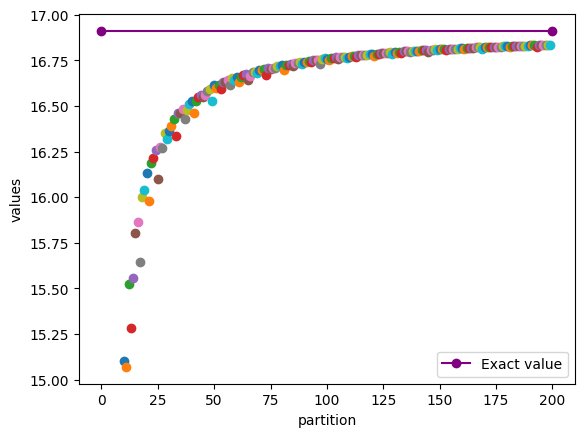

In [43]:
def draw_convergence(exact_result):
    x1, y1 = [0, 200], [exact_result, exact_result]
    plt.plot(x1,y1,marker="o", color = "purple",label="Exact value")
    
    for i in range(10,200):
        plt.scatter(i,riemann_sum(0,2,0,2,0,4,i))
        
    plt.xlabel("partition")
    plt.ylabel("values")
    plt.legend()
    plt.show()
draw_convergence(128/15 + 8/3*np.pi)